## PCA for the MNSIT 2500 Dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
X = np.loadtxt("mnist2500_X.txt")
labels = np.loadtxt("mnist2500_labels.txt")

In [17]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(2500, 784)


In [18]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T , sample_data)

In [19]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783)) # First 2 principal components

In [20]:
vectors = vectors.T

Projecting the original data sample on the plane formed by two principal eigenvectors by vector-vector multiplication

In [21]:
new_coordinates = np.matmul(vectors, sample_data.T)

In [22]:
new_coordinates

array([[  3.63104195,   4.69046247, -10.28430749, ...,   6.65906971,
         -2.75822787,   9.92352572],
       [  0.10305262,   9.43753985,   2.14628099, ...,  -6.06000782,
          0.90334085,   4.76455647]])

In [23]:
np.vstack((new_coordinates, labels)).T

array([[  3.63104195,   0.10305262,   5.        ],
       [  4.69046247,   9.43753985,   0.        ],
       [-10.28430749,   2.14628099,   4.        ],
       ...,
       [  6.65906971,  -6.06000782,   1.        ],
       [ -2.75822787,   0.90334085,   6.        ],
       [  9.92352572,   4.76455647,   2.        ]])

In [31]:
df = pd.DataFrame(data=np.vstack((new_coordinates, labels)).T, columns=("PC1", "PC2", "label"))

In [32]:
df.head()

,PC1,PC2,label
0,3.631042,0.103053,5.0
1,4.690462,9.437540,0.0
2,-10.284307,2.146281,4.0
3,5.319402,-7.888600,1.0
4,-6.711094,-6.125824,9.0


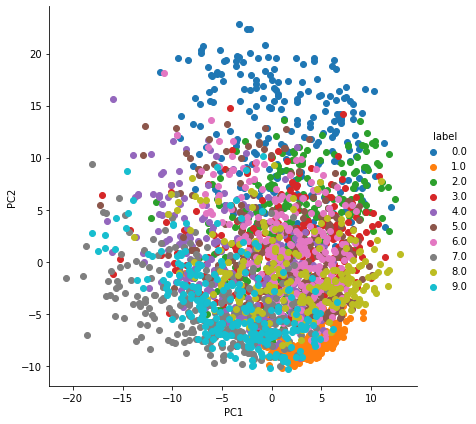

In [33]:
import seaborn as sn
sn.FacetGrid(df, hue="label", height=6).map(plt.scatter, "PC1", "PC2").add_legend()
plt.show()

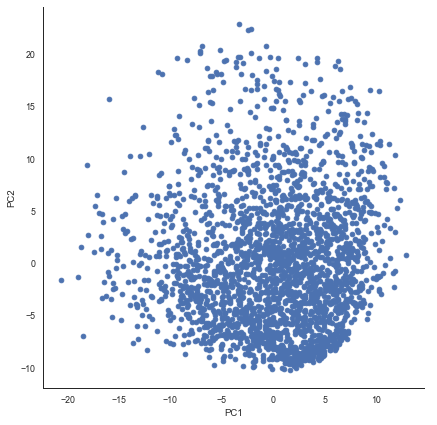

In [53]:
import seaborn as sn
sn.FacetGrid(df, height=6).map(plt.scatter, "PC1", "PC2").add_legend()
plt.show()

## Multidimensional Scaling for MNSIT 2500

In [37]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
mds = MDS(2,random_state=0)

In [41]:
%%time
X_2d = mds.fit_transform(X_scaled)

CPU times: user 3min 52s, sys: 17.9 s, total: 4min 9s
Wall time: 2min 10s


In [42]:
X_2d

array([[-5.38955334,  2.96747354],
       [-4.70973445,  8.19096187],
       [11.16823353,  1.92675173],
       ...,
       [-5.425185  , -6.44048833],
       [ 5.16625102,  5.71182164],
       [-9.4143066 ,  1.55160581]])

In [48]:
print(X_2d.shape)
print(labels.shape)

(2500, 2)
(2500,)


In [49]:
np.c_[X_2d, labels]

array([[-5.38955334,  2.96747354,  5.        ],
       [-4.70973445,  8.19096187,  0.        ],
       [11.16823353,  1.92675173,  4.        ],
       ...,
       [-5.425185  , -6.44048833,  1.        ],
       [ 5.16625102,  5.71182164,  6.        ],
       [-9.4143066 ,  1.55160581,  2.        ]])

In [50]:
df2 = pd.DataFrame(data=np.c_[X_2d, labels], columns=("Coord1", "Coord2", "label"))

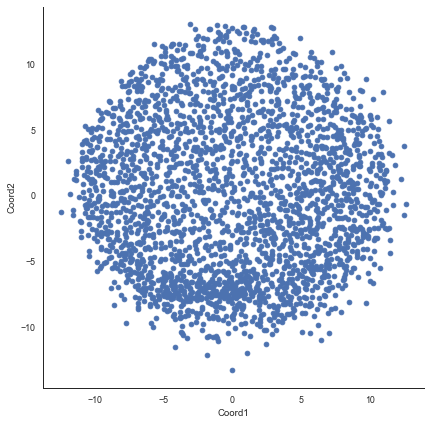

In [52]:
# No colors
sn.FacetGrid(df2, height=6).map(plt.scatter, "Coord1", "Coord2").add_legend()
plt.show()

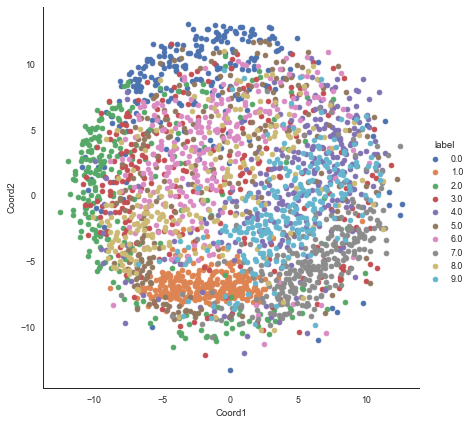

In [51]:
# Colors
import seaborn as sn
sn.FacetGrid(df2, hue="label", height=6).map(plt.scatter, "Coord1", "Coord2").add_legend()
plt.show()